In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os

In [7]:
df = pd.read_csv("./dataset/combined_train_dataset.csv")
df = df.dropna(subset=['Lithology_code'])
df

,file_name,filename,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
7442,16_1-2_part_2,NaN,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.905998,...,NaN,NaN,NaN,NaN,455221.34375,8.023255,1.683155,-2620.580078,73.558113,2645.580001
7443,16_1-2_part_2,NaN,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.792545,...,NaN,NaN,NaN,NaN,455221.34375,8.024439,1.743812,-2620.731934,73.467598,2645.732002
7444,16_1-2_part_2,NaN,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,55.627075,...,NaN,NaN,NaN,NaN,455221.34375,8.025548,1.765278,-2620.884033,72.116478,2645.884002
7445,16_1-2_part_2,NaN,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,55.470150,...,NaN,NaN,NaN,NaN,455221.34375,8.026745,1.672552,-2621.035889,69.835365,2646.036002
7446,16_1-2_part_2,NaN,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.290169,...,NaN,NaN,NaN,NaN,455221.34375,8.027942,1.478103,-2621.187988,67.834320,2646.188002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304276,25_9-1_part_1,NaN,30000.0,NaN,12.250001,NaN,0.444816,NaN,0.319061,99.948418,...,NaN,NaN,NaN,NaN,483538.03125,12.278873,0.447957,-1280.314209,64.063187,1305.422000
304277,25_9-1_part_1,NaN,30000.0,NaN,12.250001,NaN,0.446592,NaN,0.322394,99.947151,...,NaN,NaN,NaN,NaN,483538.03125,12.277086,0.449823,-1280.466187,63.323219,1305.574000
304278,25_9-1_part_1,NaN,30000.0,NaN,12.250001,NaN,0.445796,NaN,0.326236,99.914108,...,NaN,NaN,NaN,NaN,483538.03125,12.276823,0.448358,-1280.618042,2901.263932,1305.726000
304279,25_9-1_part_1,NaN,30000.0,NaN,12.250001,NaN,0.442556,NaN,0.330221,98.451340,...,NaN,NaN,NaN,NaN,483538.03125,12.277803,0.443910,-1280.770142,63.589741,1305.878000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250400 entries, 7442 to 304280
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   file_name       250400 non-null  object 
 1   filename        0 non-null       float64
 2   Lithology_code  250400 non-null  float64
 3   ROPA            18183 non-null   float64
 4   BS              117679 non-null  float64
 5   PEF             148118 non-null  float64
 6   RXO             67715 non-null   float64
 7   DCAL            70215 non-null   float64
 8   RMIC            23041 non-null   float64
 9   ROP             201089 non-null  float64
 10  SP              187010 non-null  float64
 11  RMED            236639 non-null  float64
 12  GR              249992 non-null  float64
 13  DTC             234361 non-null  object 
 14  MUDWEIGHT       157111 non-null  float64
 15  Y_LOC           249676 non-null  float64
 16  DRHO            208370 non-null  float64
 17  DEPTH_MD    

# Handling Missing Value

## Drop Missing Value > 80%

In [10]:
# Calculate percentage of missing values
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
filename          100.000000
DTS                94.622604
SGR                93.070687
ROPA               92.738419
RMIC               90.798323
RXO                72.957268
DCAL               71.958866
RSHA               53.367013
BS                 53.003594
NPHI               46.420527
PEF                40.847444
MUDWEIGHT          37.255990
SP                 25.315495
ROP                19.692891
RHOB               17.150160
DRHO               16.785144
DTC                 6.405351
RMED                5.495607
CALI                4.877796
Z_LOC               0.289137
Y_LOC               0.289137
DEPTH_MD            0.289137
X_LOC               0.289137
RDEP                0.162939
GR                  0.162939
file_name           0.000000
Lithology_code      0.000000
DEPT                0.000000
dtype: float64


In [11]:
# Drop columns with more than 80% missing values
drop_columns = missing_percentage[missing_percentage > 80].index
df.drop(columns=drop_columns, inplace=True)
print(f"Dropped columns with >80% missing values: {list(drop_columns)}")

Dropped columns with >80% missing values: ['filename', 'DTS', 'SGR', 'ROPA', 'RMIC']


## Fill Missing Value

In [15]:
# 1. Interpolation for depth-related features
df['DEPTH_MD'] = df['DEPTH_MD'].interpolate()
df['DEPT'] = df['DEPT'].interpolate()

# 2. Mean imputation for spatial features
df['X_LOC'].fillna(df['X_LOC'].mean(), inplace=True)
df['Y_LOC'].fillna(df['Y_LOC'].mean(), inplace=True)
df['Z_LOC'].fillna(df['Z_LOC'].mean(), inplace=True)

# 3. Interpolation for log measurements
df['GR'] = df['GR'].interpolate()
df['SP'] = df['SP'].interpolate()
df['CALI'] = df['CALI'].interpolate()

df

,file_name,Lithology_code,BS,PEF,RXO,DCAL,ROP,SP,RMED,GR,...,DRHO,DEPTH_MD,RHOB,NPHI,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
7442,16_1-2_part_2,65000.0,8.500000,NaN,NaN,NaN,56.905998,100.044289,1.689291,73.558113,...,-0.003,2645.580078,NaN,NaN,455221.34375,8.023255,1.683155,-2620.580078,73.558113,2645.580001
7443,16_1-2_part_2,65000.0,8.500000,NaN,NaN,NaN,56.792545,100.293167,1.746271,73.467598,...,-0.003,2645.731934,NaN,NaN,455221.34375,8.024439,1.743812,-2620.731934,73.467598,2645.732002
7444,16_1-2_part_2,65000.0,8.500000,NaN,NaN,NaN,55.627075,100.508331,1.756988,72.116478,...,-0.003,2645.884033,NaN,NaN,455221.34375,8.025548,1.765278,-2620.884033,72.116478,2645.884002
7445,16_1-2_part_2,65000.0,8.500000,NaN,NaN,NaN,55.470150,100.170883,1.654294,69.835365,...,-0.003,2646.035889,NaN,NaN,455221.34375,8.026745,1.672552,-2621.035889,69.835365,2646.036002
7446,16_1-2_part_2,65000.0,8.500000,NaN,NaN,NaN,56.290169,99.813011,1.458692,67.834320,...,-0.003,2646.187988,NaN,NaN,455221.34375,8.027942,1.478103,-2621.187988,67.834320,2646.188002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304276,25_9-1_part_1,30000.0,12.250001,NaN,0.444816,NaN,99.948418,138.276688,0.445203,64.063187,...,NaN,1305.421997,NaN,NaN,483538.03125,12.278873,0.447957,-1280.314209,64.063187,1305.422000
304277,25_9-1_part_1,30000.0,12.250001,NaN,0.446592,NaN,99.947151,137.679504,0.449377,63.323219,...,NaN,1305.573975,NaN,NaN,483538.03125,12.277086,0.449823,-1280.466187,63.323219,1305.574000
304278,25_9-1_part_1,30000.0,12.250001,NaN,0.445796,NaN,99.914108,137.264862,0.449279,2901.263932,...,NaN,1305.725952,NaN,NaN,483538.03125,12.276823,0.448358,-1280.618042,2901.263932,1305.726000
304279,25_9-1_part_1,30000.0,12.250001,NaN,0.442556,NaN,98.451340,137.055588,0.445619,63.589741,...,NaN,1305.878052,NaN,NaN,483538.03125,12.277803,0.443910,-1280.770142,63.589741,1305.878000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250400 entries, 7442 to 304280
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   file_name       250400 non-null  object 
 1   Lithology_code  250400 non-null  float64
 2   BS              117679 non-null  float64
 3   PEF             148118 non-null  float64
 4   RXO             67715 non-null   float64
 5   DCAL            70215 non-null   float64
 6   ROP             201089 non-null  float64
 7   SP              250400 non-null  float64
 8   RMED            236639 non-null  float64
 9   GR              250400 non-null  float64
 10  DTC             234361 non-null  object 
 11  MUDWEIGHT       157111 non-null  float64
 12  Y_LOC           250400 non-null  float64
 13  DRHO            208370 non-null  float64
 14  DEPTH_MD        250400 non-null  float64
 15  RHOB            207456 non-null  float64
 16  NPHI            134163 non-null  float64
 17  X_LOC       

In [23]:
# 4. Predict missing values in sonic logs using regression
from sklearn.linear_model import LinearRegression

# Convert columns to numeric, forcing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for target in ['DTC']:
    if target in df.columns:
        # Ensure no NaN in predictors
        temp_df = df.dropna(subset=['RHOB', 'NPHI', target])
        
        if not temp_df.empty:  # Avoid fitting on empty data
            model = LinearRegression().fit(temp_df[['RHOB', 'NPHI']], temp_df[target])
            missing_idx = df[target].isna() & df['RHOB'].notna() & df['NPHI'].notna()
            
            if missing_idx.sum() > 0:  # Ensure there are values to predict
                df.loc[missing_idx, target] = model.predict(df.loc[missing_idx, ['RHOB', 'NPHI']])
        
        # Fill any remaining missing values with median
        df[target].fillna(df[target])


# 5. Log transformations for resistivity values
for col in ['RSHA', 'RDEP', 'RMED']:
    if col in df.columns:
        df[f'log_{col}'] = np.log1p(df[col])
        df[col].fillna(df[col].median(), inplace=True)  # Fill missing with median

# 6. Density-Neutron Crossplot Difference
if 'NPHI' in df.columns and 'RHOB' in df.columns:
    df['DNC'] = df['NPHI'] - df['RHOB']

# 7. Acoustic Impedance
if 'RHOB' in df.columns and 'DTC' in df.columns:
    df['AI'] = df['RHOB'] / df['DTC']

# 8. Resistivity Ratios
if 'RDEP' in df.columns and 'RSHA' in df.columns:
    df['R_ratio'] = df['RDEP'] / df['RSHA']
    df['R_contrast'] = df['RDEP'] - df['RSHA']
    
# 9. Rolling Statistics
if 'GR' in df.columns:
    df['GR_rolling_mean'] = df['GR'].rolling(window=5, min_periods=1).mean()
if 'RHOB' in df.columns:
    df['RHOB_rolling_std'] = df['RHOB'].rolling(window=5, min_periods=1).std()

# 10. Compute First and Second Derivatives
if 'GR' in df.columns:
    df['GR_grad'] = np.gradient(df['GR'])
    df['GR_grad2'] = np.gradient(df['GR_grad'])
if 'RHOB' in df.columns:
    df['RHOB_grad'] = np.gradient(df['RHOB'])
    df['RHOB_grad2'] = np.gradient(df['RHOB_grad'])

# 11. Compute Euclidean distance to (X_LOC, Y_LOC, Z_LOC) mean point
if all(col in df.columns for col in ['X_LOC', 'Y_LOC', 'Z_LOC']):
    x_mean, y_mean, z_mean = df['X_LOC'].mean(), df['Y_LOC'].mean(), df['Z_LOC'].mean()
    df['distance_to_mean'] = np.sqrt((df['X_LOC'] - x_mean) ** 2 + (df['Y_LOC'] - y_mean) ** 2 + (df['Z_LOC'] - z_mean) ** 2)

# Save cleaned and engineered dataset
df.to_csv("well_logs_feature_engineered.csv", index=False)

print("Feature engineering with missing value handling completed successfully!")

Feature engineering with missing value handling completed successfully!


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250400 entries, 7442 to 304280
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   file_name         0 non-null       float64
 1   Lithology_code    250400 non-null  float64
 2   BS                117679 non-null  float64
 3   PEF               148118 non-null  float64
 4   RXO               67715 non-null   float64
 5   DCAL              70215 non-null   float64
 6   ROP               201089 non-null  float64
 7   SP                250400 non-null  float64
 8   RMED              250400 non-null  float64
 9   GR                250400 non-null  float64
 10  DTC               184162 non-null  float64
 11  MUDWEIGHT         157111 non-null  float64
 12  Y_LOC             250400 non-null  float64
 13  DRHO              208370 non-null  float64
 14  DEPTH_MD          250400 non-null  float64
 15  RHOB              207456 non-null  float64
 16  NPHI              1341

# EDA

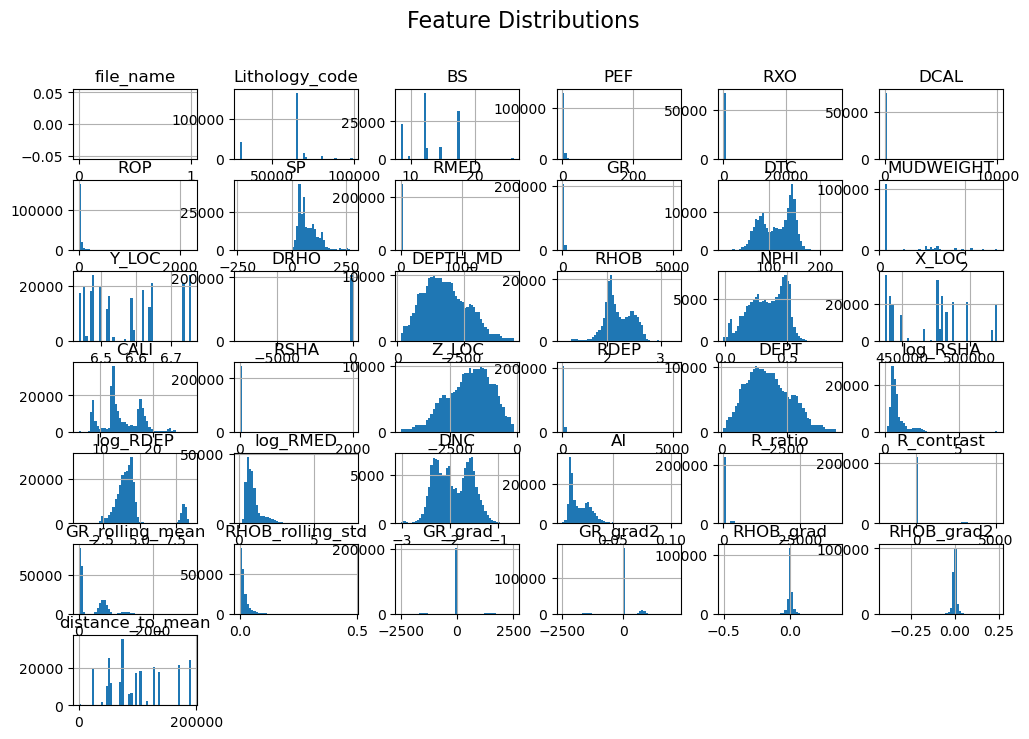

c:\Users\user.pupuk\AppData\Local\anaconda3\envs\hedging\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user.pupuk\AppData\Local\anaconda3\envs\hedging\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user.pupuk\AppData\Local\anaconda3\envs\hedging\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user.pupuk\AppData\Local\anaconda3\envs\hedging\lib\site-packages\seaborn\_oldcore.py:1119: Futur

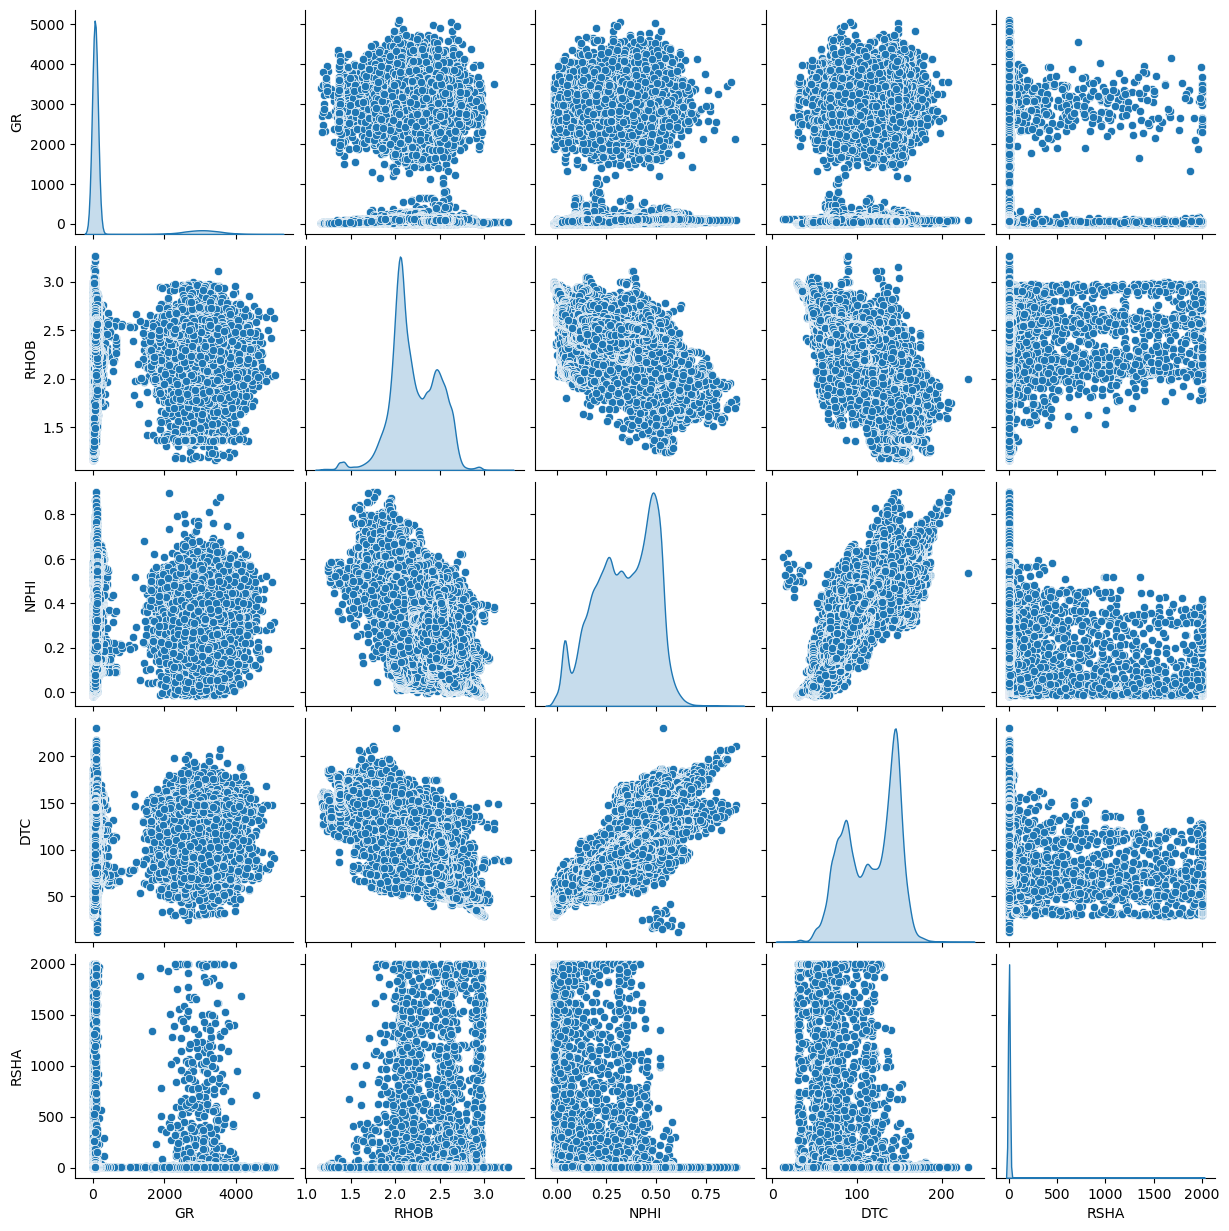

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for key features
df.hist(figsize=(12, 8), bins=50)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Pairplot for key logs
sns.pairplot(df[['GR', 'RHOB', 'NPHI', 'DTC', 'RSHA']], diag_kind="kde")
plt.show()


# Feature Engineering

In [26]:
# Vclay from Gamma Ray (GR)
if 'GR' in df.columns:
    GR_min, GR_max = df['GR'].min(), df['GR'].max()
    df['Vclay'] = (df['GR'] - GR_min) / (GR_max - GR_min)

# Density Porosity (PHI_D)
rho_matrix, rho_fluid = 2.65, 1.0  # Assumed matrix and fluid density values
if 'RHOB' in df.columns:
    df['PHI_D'] = (rho_matrix - df['RHOB']) / (rho_matrix - rho_fluid)

# Sonic Porosity (PHI_S)
if 'DTC' in df.columns:
    dt_matrix, dt_fluid = 55.5, 189.0  # Assumed matrix and fluid travel times
    df['PHI_S'] = (df['DTC'] - dt_matrix) / (dt_fluid - dt_matrix)

# Neutron-Density Porosity Difference (NDPD)
if 'NPHI' in df.columns and 'PHI_D' in df.columns:
    df['NDPD'] = df['NPHI'] - df['PHI_D']

# Water Saturation (Sw) using Archie's Equation
if all(col in df.columns for col in ['RDEP', 'PHI_D']):
    a, m, n, rw = 1.0, 2.0, 2.0, 0.1  # Archie's parameters
    df['Sw'] = (a * rw / df['RDEP']) ** (1/n) / df['PHI_D'] ** (m/n)

df

,file_name,Lithology_code,BS,PEF,RXO,DCAL,ROP,SP,RMED,GR,...,GR_grad,GR_grad2,RHOB_grad,RHOB_grad2,distance_to_mean,Vclay,PHI_D,PHI_S,NDPD,Sw
7442,NaN,65000.0,8.500000,NaN,NaN,NaN,56.905998,100.044289,1.689291,73.558113,...,-0.090515,-0.630302,NaN,NaN,40285.148369,0.014157,NaN,0.244643,NaN,NaN
7443,NaN,65000.0,8.500000,NaN,NaN,NaN,56.792545,100.293167,1.746271,73.467598,...,-0.720818,-0.862801,NaN,NaN,40285.151451,0.014139,NaN,0.248873,NaN,NaN
7444,NaN,65000.0,8.500000,NaN,NaN,NaN,55.627075,100.508331,1.756988,72.116478,...,-1.816116,-0.710131,NaN,NaN,40285.154538,0.013875,NaN,0.249163,NaN,NaN
7445,NaN,65000.0,8.500000,NaN,NaN,NaN,55.470150,100.170883,1.654294,69.835365,...,-2.141079,513.556642,NaN,NaN,40285.157621,0.013428,NaN,NaN,NaN,NaN
7446,NaN,65000.0,8.500000,NaN,NaN,NaN,56.290169,99.813011,1.458692,67.834320,...,1025.297167,-0.534281,NaN,NaN,40285.160710,0.013036,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304276,NaN,30000.0,12.250001,NaN,0.444816,NaN,99.948418,138.276688,0.445203,64.063187,...,-0.531765,709.298445,NaN,NaN,23528.085200,0.012297,NaN,NaN,NaN,NaN
304277,NaN,30000.0,12.250001,NaN,0.446592,NaN,99.947151,137.679504,0.449377,63.323219,...,1418.600373,0.332513,NaN,NaN,23528.081824,0.012152,NaN,NaN,NaN,NaN
304278,NaN,30000.0,12.250001,NaN,0.445796,NaN,99.914108,137.264862,0.449279,2901.263932,...,0.133261,-1418.620511,NaN,NaN,23528.078452,0.567964,NaN,NaN,NaN,NaN
304279,NaN,30000.0,12.250001,NaN,0.442556,NaN,98.451340,137.055588,0.445619,63.589741,...,-1418.640648,0.129817,NaN,NaN,23528.075075,0.012205,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250400 entries, 7442 to 304280
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   file_name         0 non-null       float64
 1   Lithology_code    250400 non-null  float64
 2   BS                117679 non-null  float64
 3   PEF               148118 non-null  float64
 4   RXO               67715 non-null   float64
 5   DCAL              70215 non-null   float64
 6   ROP               201089 non-null  float64
 7   SP                250400 non-null  float64
 8   RMED              250400 non-null  float64
 9   GR                250400 non-null  float64
 10  DTC               184162 non-null  float64
 11  MUDWEIGHT         157111 non-null  float64
 12  Y_LOC             250400 non-null  float64
 13  DRHO              208370 non-null  float64
 14  DEPTH_MD          250400 non-null  float64
 15  RHOB              207456 non-null  float64
 16  NPHI              1341

c:\Users\user.pupuk\AppData\Local\anaconda3\envs\hedging\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


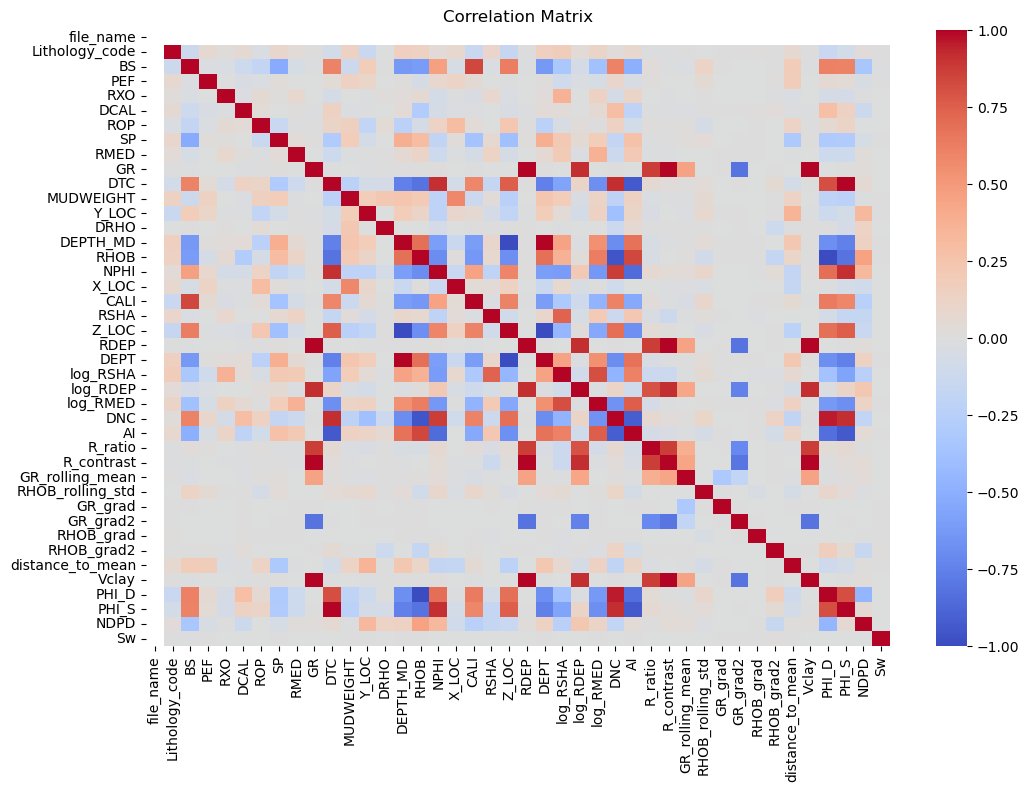

In [28]:
# Correlation Matrix and Multicollinearity Handling
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

c:\Users\user.pupuk\AppData\Local\anaconda3\envs\hedging\lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.9523

Classification Report:
              precision    recall  f1-score   support

     30000.0       0.95      0.94      0.94     43855
     65000.0       0.96      0.99      0.97    144966
     65030.0       0.91      0.76      0.83     20284
     70000.0       0.96      0.90      0.93     16767
     70032.0       0.99      0.99      0.99      5343
     74000.0       0.98      0.84      0.91      1109
     80000.0       0.94      0.94      0.94      8245
     86000.0       1.00      1.00      1.00       920
     88000.0       1.00      1.00      1.00      3919
     90000.0       0.99      1.00      1.00      1027
     93000.0       1.00      1.00      1.00       141
     99000.0       0.94      0.97      0.95      3824

    accuracy                           0.95    250400
   macro avg       0.97      0.94      0.96    250400
weighted avg       0.95      0.95      0.95    250400



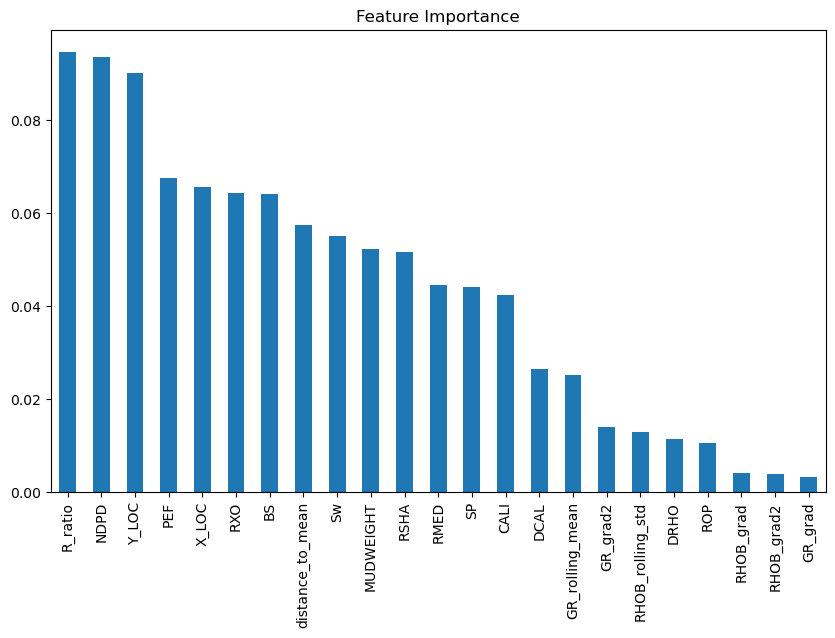

In [44]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df_train = df[['Lithology_code', 'NDPD', 'R_ratio', 'Y_LOC', 'X_LOC', 'PEF', 'BS', 'RXO', 'distance_to_mean',
               'Sw', 'RSHA', 'MUDWEIGHT', 'RMED', 'CALI', 'SP', 'GR_rolling_mean', 'DCAL', 'GR_grad2', 'RHOB_rolling_std',
               'DRHO', 'ROP', 'RHOB_grad', 'RHOB_grad2', 'GR_grad']]

# Define target and features
target_column = 'Lithology_code'  # Replace with actual target column
if target_column not in df.columns:
    raise ValueError("Target column not found in dataset!")

X = df_train.drop(columns=[target_column])
y = df_train[target_column]

# Convert target labels to categorical integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Fill missing values in features
X.fillna(X.median(), inplace=True)

# Train XGBoost Classifier
model = xgb.XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)
model.fit(X, y_encoded)  # Use encoded labels

# Predictions on the same training data
y_pred_encoded = model.predict(X)

# Convert predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Model Evaluation
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importance")
plt.show()


In [45]:
import joblib

# Save model using joblib
joblib.dump(model, "xgboost_model.pkl")

print("XGBoost model saved successfully using joblib!")


XGBoost model saved successfully using joblib!


In [46]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming y_train is your target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y)  # Fit and transform target labels

# Save the trained LabelEncoder
joblib.dump(le, "label_encoder.pkl")



['label_encoder.pkl']